In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jrnai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
thaiVilla = pd.read_excel('ThaiVillaReviews.xlsx').drop(columns = ['Unnamed: 0'])
thaiVilla['Date'] = pd.to_datetime(thaiVilla['Date'])

In [3]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date
0,312,Helena W.,5,I AM IN THE CONSTANT HUNT FOR THE BEST THAI FO...,96,81,2021-10-26
1,475,Christina W.,4,Came here on a busy Friday for a party of 2 an...,58,147,2021-10-26
2,292,Alison W.,4,thai villa is such a good date night spot or g...,244,236,2021-10-25
3,5,Marina L.,5,I must have died and gone to Thai food heaven....,52,154,2021-10-16
4,1499,Connie H.,4,This place has been on my list to eat it for a...,844,331,2021-10-24
...,...,...,...,...,...,...,...
3780,0,Stephanie M.,2,The food at Thai Villa is amazing. I've been h...,1,0,2016-12-15
3781,0,Steve S.,5,Reviews are spot on. Make a reservation otherw...,36,63,2016-12-14
3782,0,Linda R.,5,"This place is amazing, the interior makes you ...",1,0,2016-12-05
3783,0,P C.,3,This place has nice atmosphere and the food ha...,6,0,2016-11-08


In [4]:
thaiMenu = {'cashew nut', 'garlic', 'pra ram', 'eggplant basil', 'pad krapraw', 'krapraw gai sub', 'ginger', 'panang curry', 'green curry', 'red curry', 'massamuin curry', 'kua gai', 'kea mao', 'pad se-ew', 'pad thai', 'pineapple fried rice', 'basil fried rice', 'thai fried rice', 'tom yum fried rice', 'scallops skewers', 'pun sib salmon', 'kao tang na tung', 'yum pla duke foo', 'larb gai', 'papaya salad', 'thai salad', 'grilled prawn mango salad', 'grilled salmon mango salad', 'yum hua-phee tod', 'soft shell crab mango salad', 'royal pad thai', 'ped ron', 'muk goong kai kem', 'salmon jian', 'short ribs chu chee', 'hung', 'spicy chicken wings', 'gai hor bai touy', 'moo-obb nam puang', 'gai yang', 'pla lui suan', 'pla pad ped', 'chilean sea bass', 'salmon tamarind', 'talay thai', 'chicken satay', 'kha nom jeeb', 'pla muk tod', 'por pia tod', 'shrimp cake', 'curry puffs', 'tom yum koong', 'tom kha gai', 'tom juad', 'pad krapraw', 'pranam', 'red curry', 'green curry', 'massamun curry', 'panang curry', 'salmon green curry', 'thai fried rice', 'basil fried rice', 'pineapple fried rice', 'tom yum fried rice', 'crab fried rice', 'pad thai', 'kea mao', 'pad se-ew', 'kua gai', 'khao soy', 'trio sorbets', 'choco thai tea lava cake', 'banana crepe with coconut ice cream', 'kao naew peuak', 'mor khang brulee with coconut ice cream', 'soda', 'thai iced tea', 'thai iced coddee', 'lychee thai tea', 'jasmine iced tea', 'pineapple juice', 'cranberry juice', 'water', 'thai tea lemonade', 'mango sunrise', 'coconut juice', 'white rice', 'coconut sticky rice', 'steamed assorted vegetables', 'fried egg', 'peanut sauce', 'sauteed baby bok choy'}

# Distribution of the Friends Feature

In [5]:
friends = thaiVilla['Friends']

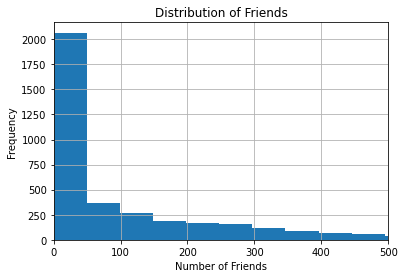

In [6]:
friends.hist(bins = 100)
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 500)
plt.title('Distribution of Friends')
#plt.figure(figsize=(20,20))
plt.show()

In [7]:
friends.describe()

count    3785.000000
mean      138.314399
std       277.567590
min         0.000000
25%         1.000000
50%        32.000000
75%       184.000000
max      4946.000000
Name: Friends, dtype: float64

# Distribution of the Ratings Feature

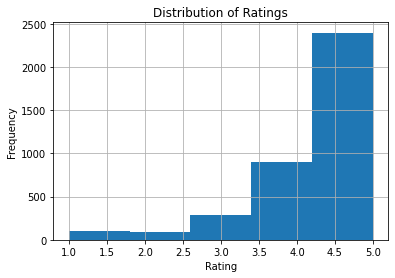

In [8]:
Ratings = thaiVilla['Rating']
Ratings.hist(bins = 5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
#plt.xlim(xmin=0, xmax = 150)
plt.title('Distribution of Ratings')
#plt.figure(figsize=(20,20))
plt.show()

In [9]:
Ratings.describe()

count    3785.000000
mean        4.428269
std         0.929146
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

# Distribution of the UserReviews Feature

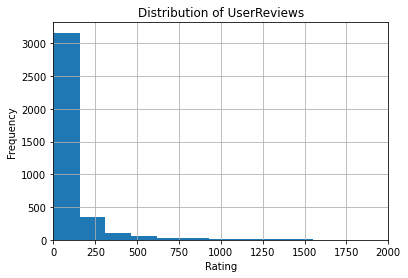

In [10]:
UserReviews = thaiVilla['UserReviews']
UserReviews.hist(bins = 50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 2000)
plt.title('Distribution of UserReviews')
#plt.figure(figsize=(20,20))
plt.show()

In [11]:
UserReviews.describe()

count    3785.000000
mean      104.158256
std       274.082942
min         1.000000
25%         8.000000
50%        27.000000
75%       100.000000
max      7738.000000
Name: UserReviews, dtype: float64

# Distribution of the Photos Feature

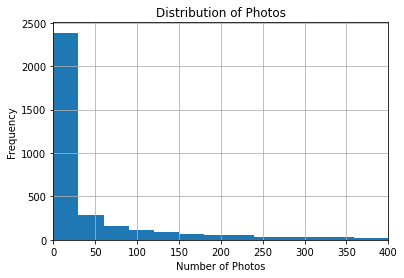

In [12]:
Photos = thaiVilla['Photos']
Photos.hist(bins = 1000)
plt.xlabel('Number of Photos')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Photos')
#plt.figure(figsize=(20,20))
plt.show()

In [13]:
Photos.describe()

count     3785.000000
mean       205.485865
std        915.277811
min          0.000000
25%          1.000000
50%         10.000000
75%         90.000000
max      29926.000000
Name: Photos, dtype: float64

# Time Series of Ratings vs Time

In [14]:
import datetime
import random
import matplotlib.pyplot as plt

In [15]:
sortedDf = thaiVilla.sort_values(['Date'], ascending=True)

In [16]:
sortedDf = pd.DataFrame(sortedDf.groupby("Date")["Rating"].mean())

In [17]:
x = sortedDf.index
y = sortedDf['Rating']

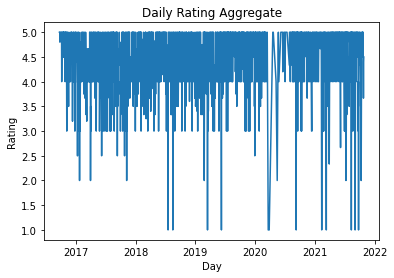

<Figure size 3600x1080 with 0 Axes>

In [18]:
plt.plot(x,y)
plt.title('Daily Rating Aggregate')
plt.ylabel('Rating')
plt.xlabel('Day')
plt.figure(figsize=(50,15))
plt.show()

In [19]:
sortedDf = thaiVilla.sort_values(['Date'], ascending=True)

In [20]:
monthlyRating = pd.DataFrame(sortedDf.groupby([sortedDf['Date'].dt.year.rename('year'), sortedDf['Date'].dt.month_name().rename('month')])['Rating'].mean().reset_index())

In [21]:
monthlyRating['my'] = monthlyRating['year'].astype(str) + ' ' + monthlyRating['month'].astype(str)

In [22]:
monthlyRating

,year,month,Rating,my
0,2016,December,4.390244,2016 December
1,2016,November,4.421053,2016 November
2,2016,October,4.780488,2016 October
3,2016,September,4.941176,2016 September
4,2017,April,4.338235,2017 April
...,...,...,...,...
57,2021,June,4.500000,2021 June
58,2021,March,4.225000,2021 March
59,2021,May,4.869565,2021 May
60,2021,October,4.315789,2021 October


In [23]:
x = monthlyRating['my']
y = monthlyRating['Rating']

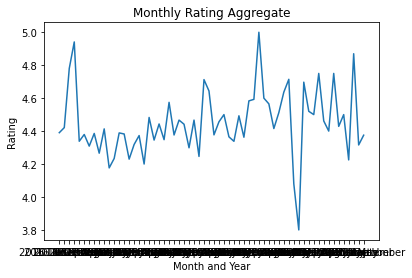

<Figure size 3600x1080 with 0 Axes>

In [24]:
plt.plot(x,y)
plt.title('Monthly Rating Aggregate')
plt.ylabel('Rating')
plt.xlabel('Month and Year')
plt.figure(figsize=(50,15))
plt.show()

# Food Occurences in Menu

In [25]:
lst = []
for i, row in thaiVilla.iterrows():
    count = 0
    s = row.Review.lower().replace(' ', '')
    for i in thaiMenu:
        if i.replace(' ', '') in s:
            count += 1
    lst.append(count)
    
#     print(i, row)
#     count = 0
#     s = row.Review.lower()
#     s = s.plit()
#     seven = s[:7]
#     six = s[:6]
#     five = s[:5]
#     four = s[:4]
#     three = s[:3]
#     two = s[:2]
#     for j in s:
#         if j in thaiMenu:
#             count += 1
#     for j in s:
#         if seven in s or sixe.....:
#             count += 1
#         seven = seven[1:] + [j]
#         ...
#     lst.append(count)
#     break

In [26]:
thaiVilla['Food Occurs'] = lst

# Catching Sentiment in Reviews

In [27]:
positive = {'best', 'amazing', 'love', 'good', 'perfect', 'fantastic', 'beautiful', 'yummy', 'delicious'}
negative = {'horrible', 'bad', 'gross', 'hate', 'disgusting', 'dread', 'terrible'}

In [39]:
plst = []
nlst = []
slst = []
for i, row in thaiVilla.iterrows():
    gcount = 0
    ncount = 0
    s = row.Review.lower().replace(' ', '')
    for i in positive:
        if i in s:
            gcount += 1
    for i in negative:
        if i in s:
            ncount += 1
    score = sid.polarity_scores(s)
    plst.append(gcount)
    nlst.append(ncount)
    slst.append(score['compound'])

KeyError: 'positive'

In [36]:
thaiVilla['Positive Occurs'] = plst
thaiVilla['Negative Occurs'] = nlst
thaiVilla['Sentiment Score'] = slst

In [37]:
thaiVilla

,Friends,Name,Rating,Review,UserReviews,Photos,Date,Food Occurs,Positive Occurs,Negative Occurs,Sentiment Score
0,312,Helena W.,5,I AM IN THE CONSTANT HUNT FOR THE BEST THAI FO...,96,81,2021-10-26,4,7,0,0.0
1,475,Christina W.,4,Came here on a busy Friday for a party of 2 an...,58,147,2021-10-26,2,1,0,0.0
2,292,Alison W.,4,thai villa is such a good date night spot or g...,244,236,2021-10-25,2,3,0,0.0
3,5,Marina L.,5,I must have died and gone to Thai food heaven....,52,154,2021-10-16,0,2,0,0.0
4,1499,Connie H.,4,This place has been on my list to eat it for a...,844,331,2021-10-24,0,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3780,0,Stephanie M.,2,The food at Thai Villa is amazing. I've been h...,1,0,2016-12-15,0,1,0,0.0
3781,0,Steve S.,5,Reviews are spot on. Make a reservation otherw...,36,63,2016-12-14,0,0,0,0.0
3782,0,Linda R.,5,"This place is amazing, the interior makes you ...",1,0,2016-12-05,2,3,0,0.0
3783,0,P C.,3,This place has nice atmosphere and the food ha...,6,0,2016-11-08,0,1,0,0.0


# Correlation Heatmap

<AxesSubplot:>

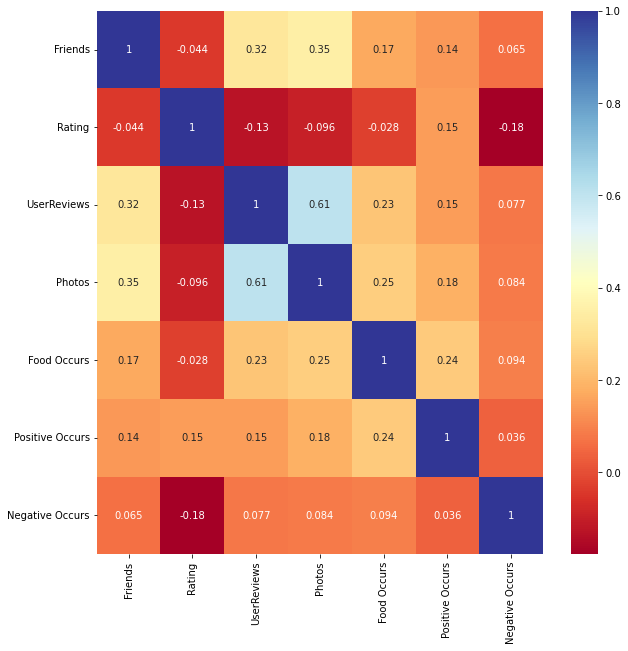

In [31]:
correlation = thaiVilla[['Friends', 'Rating', 'UserReviews', 'Photos', 'Food Occurs', 'Positive Occurs', 'Negative Occurs']]

corr = correlation.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="RdYlBu")

# Positive Sentiment Analysis

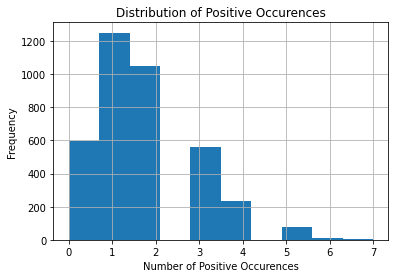

In [32]:
posOcc = thaiVilla['Positive Occurs']
posOcc.hist(bins = 10)
plt.xlabel('Number of Positive Occurences')
plt.ylabel('Frequency')
# plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Positive Occurences')
#plt.figure(figsize=(20,20))
plt.show()

# Negative Sentiment Analysis

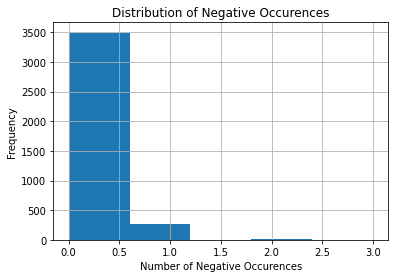

In [33]:
negOcc = thaiVilla['Negative Occurs']
negOcc.hist(bins = 5)
plt.xlabel('Number of Negative Occurences')
plt.ylabel('Frequency')
# plt.xlim(xmin=0, xmax = 400)
plt.title('Distribution of Negative Occurences')
#plt.figure(figsize=(20,20))
plt.show()

In [34]:
score_df = pd.DataFrame(columns = ['Menu Item', 'Positive', 'Negative', 'Neutral', 'Score'])

for item in thaiMenu:
    item = item.lower()
    pos = 0
    neg = 0
    neu = 0
    rating = 0
    for review in thaiVilla['Review']:
        review = review.lower()
        sentences_with_item = []
        sents = nltk.tokenize.sent_tokenize(review)
        for sent in sents:
           if sent.find(item) != -1:
                sentences_with_item.append(sent)
        for sent in sentences_with_item:
           # print(sent)
            score = sid.polarity_scores(sent)
            #print(score)
            rating += score['compound']
            if score['compound'] > 0:
                pos += 1
            elif score['compound'] < 0:
                neg += 1
            else:
                neu += 1
    total_mentions = pos + neg + neu
    if total_mentions > 10:
        #pct_pos = pos / total_mentions
        avg = rating / total_mentions

        score_df = score_df.append({'Menu Item' : item, 'Positive' : pos, 'Negative' : neg, 'Neutral' : neu, 'Score': avg},
                ignore_index = True)
score_df = score_df.sort_values(by=['Score'])
print('WORST')
for index, row in score_df.head(3).iterrows():
    print(row['Menu Item'] + ': ' + str(row['Score']))
print()
print('BEST')
for index, row in score_df.tail(3).iterrows():
    print(row['Menu Item'] + ': ' + str(row['Score']))
    # print(item)
    # print('pos: ' + str(pos))
    # print('neg ' + str(neg))
    # print()
score_df







WORST
coconut sticky rice: 0.22740434782608698
chilean sea bass: 0.25491538461538454
spicy chicken wings: 0.2627560975609756

BEST
mango sunrise: 0.48660000000000003
larb gai: 0.5394142857142856
gai hor bai touy: 0.6178727272727272


,Menu Item,Positive,Negative,Neutral,Score
18,coconut sticky rice,10,4,9,0.227404
14,chilean sea bass,20,5,14,0.254915
37,spicy chicken wings,21,4,16,0.262756
29,hung,42,11,18,0.287894
10,white rice,6,0,6,0.300600
36,green curry,103,14,57,0.312152
25,eggplant basil,14,1,9,0.312375
3,pineapple fried rice,37,5,25,0.316176
28,thai fried rice,20,1,11,0.327919
13,water,131,14,56,0.334423
